In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:\Complete ML Bootcamp Udemy\Saved_Data\Algerian_Forest_Fires_Cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [7]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [9]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0, 1)

In [10]:
df['Classes'].unique()

array([0, 1])

In [11]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [13]:
X = df.drop(['FWI'],axis=1)

In [14]:
X

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [15]:
y = df['FWI']

In [16]:
# Train test Split

from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40) 

In [17]:
X_train.shape, X_test.shape

((182, 12), (61, 12))

In [21]:
X_train.corr()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Unnamed: 0,1.000000,0.200530,-0.396872,-0.131285,-0.039985,0.263951,0.252932,0.048752,0.320169,0.170440,0.232500,0.872442
Temperature,0.200530,1.000000,-0.670895,-0.309967,-0.323933,0.678800,0.510329,0.409550,0.631343,0.484508,0.542602,0.223795
RH,-0.396872,-0.670895,1.000000,0.242079,0.250252,-0.703033,-0.424401,-0.240701,-0.741406,-0.364836,-0.520424,-0.390832
Ws,-0.131285,-0.309967,0.242079,1.000000,0.272414,-0.227417,-0.007541,0.056127,-0.029194,0.019347,-0.129204,-0.137189
Rain,-0.039985,-0.323933,0.250252,0.272414,1.000000,-0.511986,-0.291812,-0.300094,-0.339451,-0.300894,-0.378860,-0.043905
FFMC,0.263951,0.678800,-0.703033,-0.227417,-0.511986,1.000000,0.625271,0.523760,0.750848,0.609133,0.798691,0.206310
DMC,0.252932,0.510329,-0.424401,-0.007541,-0.291812,0.625271,1.000000,0.887003,0.666945,0.982374,0.599226,0.169910
DC,0.048752,0.409550,-0.240701,0.056127,-0.300094,0.523760,0.887003,1.000000,0.483607,0.947206,0.508630,-0.093126
ISI,0.320169,0.631343,-0.741406,-0.029194,-0.339451,0.750848,0.666945,0.483607,1.000000,0.623279,0.744079,0.293776
BUI,0.170440,0.484508,-0.364836,0.019347,-0.300894,0.609133,0.982374,0.947206,0.623279,1.000000,0.594729,0.064223


<Axes: >

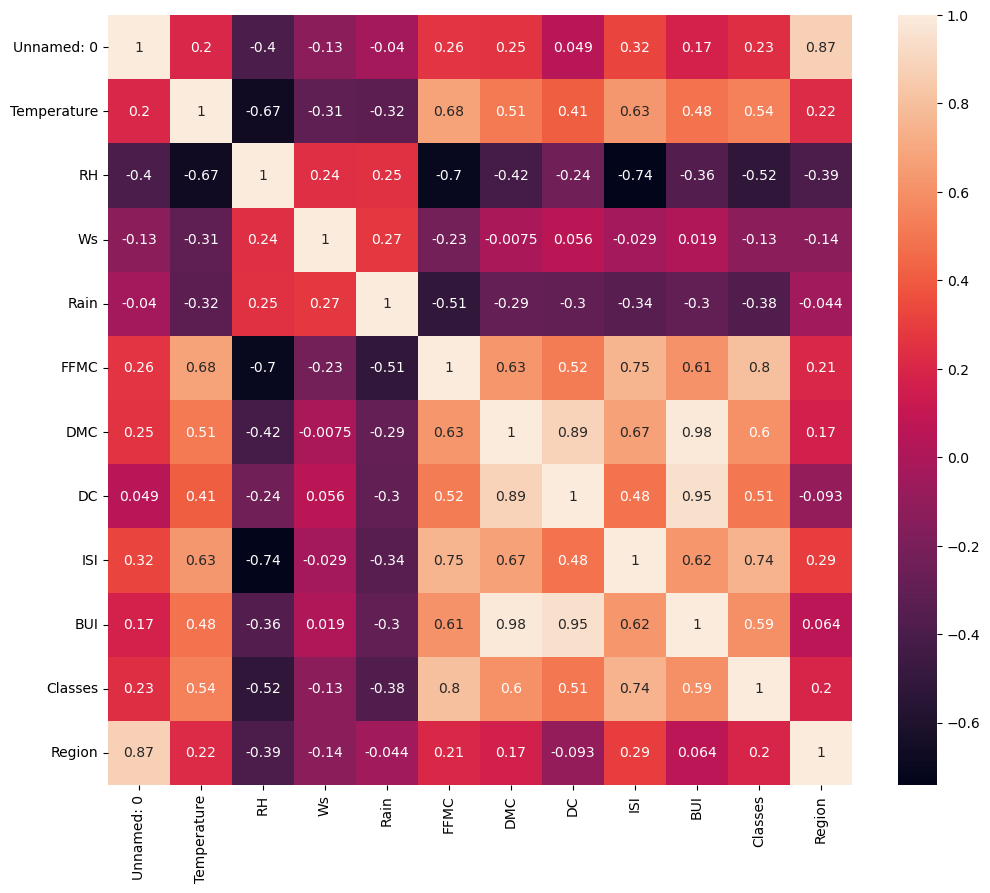

In [22]:
plt.figure(figsize=(12,10))

sns.heatmap(X_train.corr(), annot=True)

In [23]:
def correlation(dataset,treshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > treshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [26]:
correlation_features = correlation(X_train, 0.88)

In [27]:
correlation_features

{'BUI', 'DC'}

In [28]:
X_train.drop(correlation_features,axis=1,inplace=True)
X_test.drop(correlation_features,axis=1,inplace=True)

In [29]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [30]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int32  
 12  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(5)
memory usage: 23.9 KB


In [32]:
# Standardizing the model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled =scaler.transform(X_test)

C:\Users\abman\AppData\Local\Temp\ipykernel_12596\3843472667.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'After scaling')

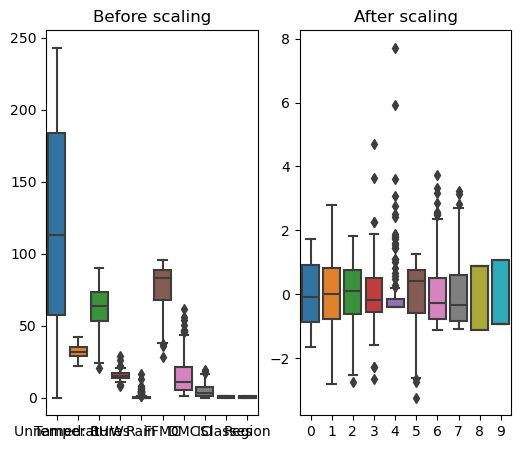

In [33]:
plt.subplots(figsize=(6,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_Scaled)
plt.title('After scaling')

In [34]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()

model.fit(X_train_Scaled,y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [36]:
print('mse:',mse)
print('r2_score',r2)

mse: 0.5399561664335545
r2_score 0.9883190106317338


In [37]:
from sklearn.linear_model import Lasso
model =Lasso()

model.fit(X_train_Scaled,y_train)
y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)

mse: 2.3301628563012486
r2_score 0.9495910793452655


In [38]:
from sklearn.linear_model import Ridge
model =Ridge()

model.fit(X_train_Scaled,y_train)
y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)

mse: 0.5544015951075645
r2_score 0.9880065095265502


In [39]:
from sklearn.linear_model import ElasticNet
model =ElasticNet()

model.fit(X_train_Scaled,y_train)
y_pred = model.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)

mse: 5.885482243572483
r2_score 0.8726780805775842


# Cross Validation

In [40]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_Scaled,y_train)

LassoCV(cv=5)

mse: 0.5381326085645423
r2_score 0.9883584600563436


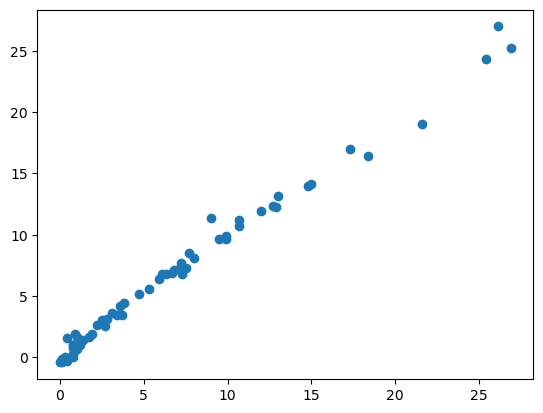

In [41]:
y_pred = lassocv.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)
plt.scatter(y_test,y_pred)

mse: 0.5544015951075645
r2_score 0.9880065095265502


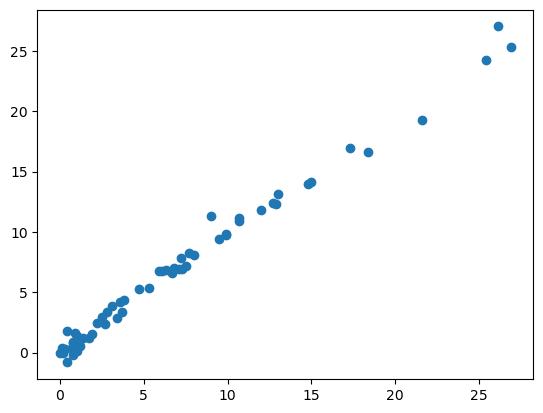

In [42]:
from sklearn.linear_model import RidgeCV
RidgeCV = RidgeCV(cv=5)
RidgeCV.fit(X_train_Scaled,y_train)

y_pred = RidgeCV.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)
plt.scatter(y_test,y_pred)

In [45]:
RidgeCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

mse: 0.6130587904669426
r2_score 0.9867375656419183


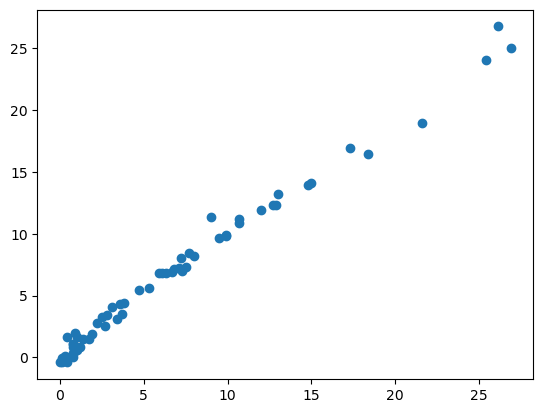

In [46]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=5)
ElasticNetCV.fit(X_train_Scaled,y_train)

y_pred = ElasticNetCV.predict(X_test_Scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse:',mse)
print('r2_score',r2)
plt.scatter(y_test,y_pred)

# Model Pickling

In [47]:
scaler

StandardScaler()

In [48]:
RidgeCV

RidgeCV(cv=5)

In [49]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(RidgeCV,open('ridgecv.pkl','wb'))